In [78]:
!pip install shap
!pip install lime
!pip install -U scikit-learn


In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [80]:
# Upload the File to Colab: If the file is on your local computer:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full (1).csv


In [81]:
# Move the File to Google Drive: If you want to work with files stored on Google Drive:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/bank-additional-full.csv', delimiter=';')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

In [82]:
print(data)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [84]:
# A descriptive summary of all columns in a DataFrame, regardless of their data type
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [85]:
# A concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [86]:
# provides the dimensions of a DataFrame as a tuple (number_of_rows, number_of_columns)
data.shape

(41188, 21)

In [87]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
41183,False
41184,False
41185,False
41186,False


In [88]:
data =data.drop_duplicates() # Removes duplicate rows from the DataFrame
data = data.dropna() # Removes rows from the DataFrame that contain missing values (NaN)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [90]:
# The names of all the columns in the DataFrame
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [91]:
# groups the DataFrame by the values in the column y and then calculates the mean for all numerical columns within each group.
data.groupby(by='y').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.910994,220.868079,2.633385,984.109396,0.132414,0.248885,93.603798,-40.593232,3.811482,5176.165690
yes,40.912266,553.256090,2.051951,791.990946,0.492779,-1.233089,93.354577,-39.791119,2.123362,5095.120069


In [92]:
# count the occurrences of each unique value in the column y of the DataFrame
data.y.value_counts()

,count
y,
no,36537
yes,4639


In [93]:
# removes the column named 'euribor3m' from the DataFrame
data =data.drop(['euribor3m'], axis=1)

In [94]:
data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
38549,75,retired,divorced,basic.4y,no,no,no,cellular,oct,thu,247,2,999,0,nonexistent,-3.4,92.431,-26.9,5017.5,no
25409,36,technician,single,professional.course,no,yes,no,telephone,nov,tue,34,1,999,0,nonexistent,-0.1,93.200,-42.0,5195.8,no
8707,36,technician,single,basic.9y,unknown,yes,no,telephone,jun,wed,227,2,999,0,nonexistent,1.4,94.465,-41.8,5228.1,no
38250,44,technician,married,basic.9y,no,yes,no,cellular,oct,tue,306,1,2,1,success,-3.4,92.431,-26.9,5017.5,no
41087,30,blue-collar,single,professional.course,no,yes,no,cellular,nov,tue,111,2,999,0,nonexistent,-1.1,94.767,-50.8,4963.6,no
2601,25,self-employed,single,university.degree,no,no,no,telephone,may,tue,247,3,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
16216,31,admin.,single,university.degree,no,yes,no,cellular,jul,tue,82,3,999,0,nonexistent,1.4,93.918,-42.7,5228.1,no
28852,28,technician,married,basic.9y,no,yes,no,cellular,apr,thu,75,1,999,0,nonexistent,-1.8,93.075,-47.1,5099.1,no
12352,27,admin.,married,university.degree,no,yes,yes,telephone,jul,fri,178,2,999,0,nonexistent,1.4,93.918,-42.7,5228.1,no
26586,52,retired,married,university.degree,no,yes,no,telephone,nov,thu,188,2,999,0,nonexistent,-0.1,93.200,-42.0,5195.8,no


In [95]:
# calculates the number of rows in the DataFrame df where the column y has the value 'yes'.
no_yes =len(data[data['y'] == 'yes'])

#prints a summary of the DataFrame and the count of rows where the column y equals 'yes'
print(f'train shape: {data.shape}; y=yes: {no_yes}')

train shape: (41176, 20); y=yes: 4639


# Data Visualization

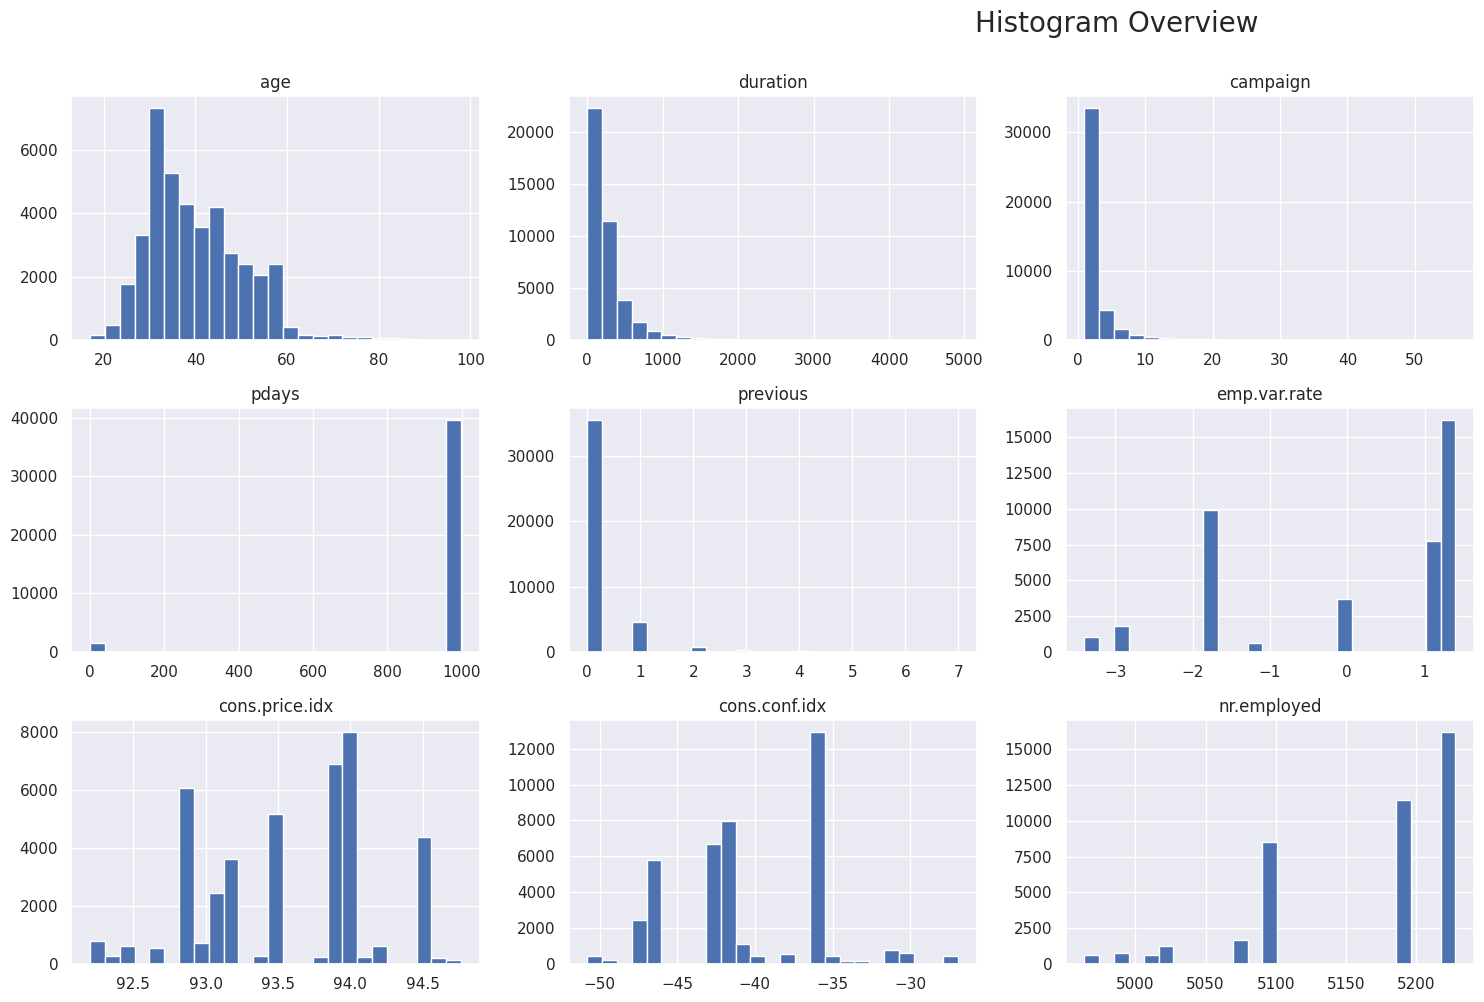

In [96]:
# Histogram Overview
data.hist(bins=25, figsize=(15,10))
plt.suptitle('Histogram Overview', x=0.75, y=1, ha='center', fontsize=20)
plt.tight_layout()
plt.show()



*   Age: Most between 30–40; few outliers near 100.

*   Duration: Right-skewed, dominated by short durations.

*   Campaign: Most contacted 1–2 times; few above 10.
*   Pdays: Majority at 999 (rarely contacted); few recent contacts.


*   Previous: Most had no prior contacts.


*   Emp.var.rate: Peaks around specific values.

*   Cons.price.idx & Cons.conf.idx: Clustered near 93.5–94 and -40 to -35, respectively.
*   Euribor3m & Nr.employed: Show distinct peaks, reflecting economic data trends.

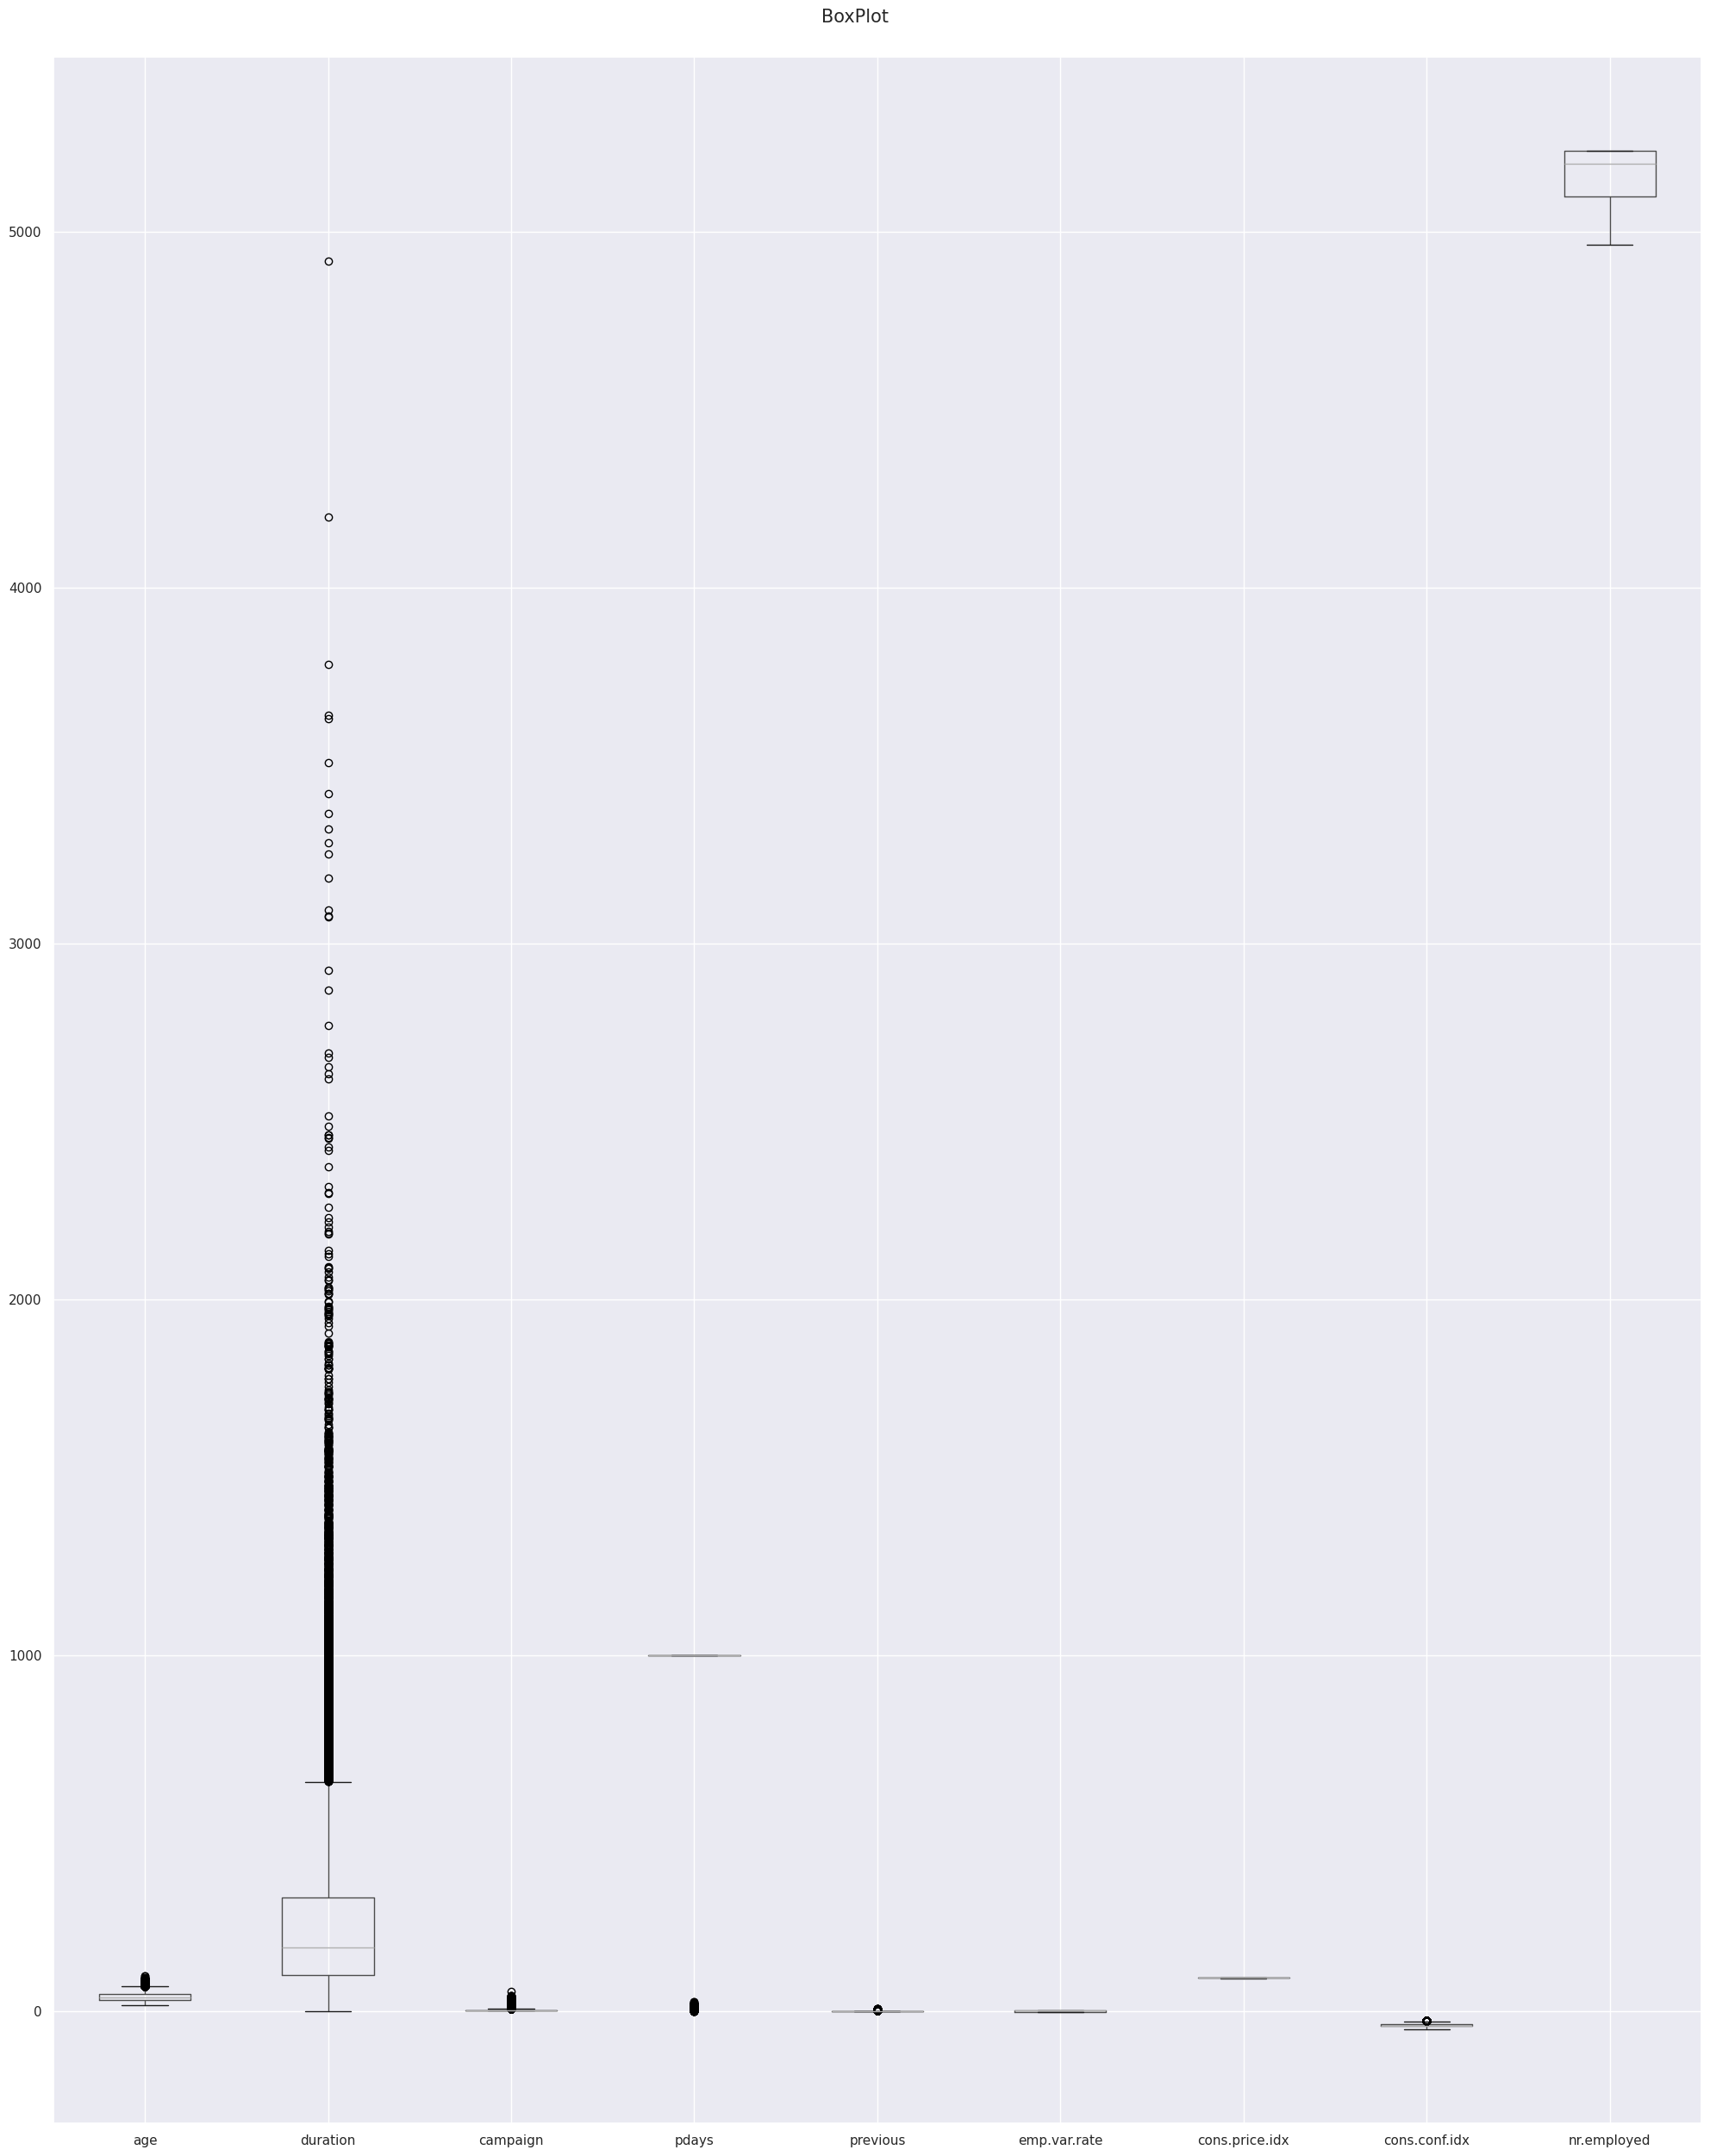

In [98]:
data.boxplot(figsize=(20,25))
plt.suptitle('BoxPlot', x=0.5, y=1, ha='center', fontsize=15)
plt.tight_layout()
plt.show()

The boxplot shows the distribution of the dataset:

1.   Duration:    
     *   Significant outliers are present, with values extending beyond 5000.
     *   Indicates a wide variability in call durations.


2.   nr.employed:
     *   Relatively tight distribution with minimal variability.
     *   Few to no outliers are observed.
    

3.   Other Features:

     *   Features like campaign, previous, and pdays show clustered values near the lower range, with occasional outliers.
     *   Features such as age, emp.var.rate, and cons.conf.idx exhibit minimal spread and variability.










## Correlation

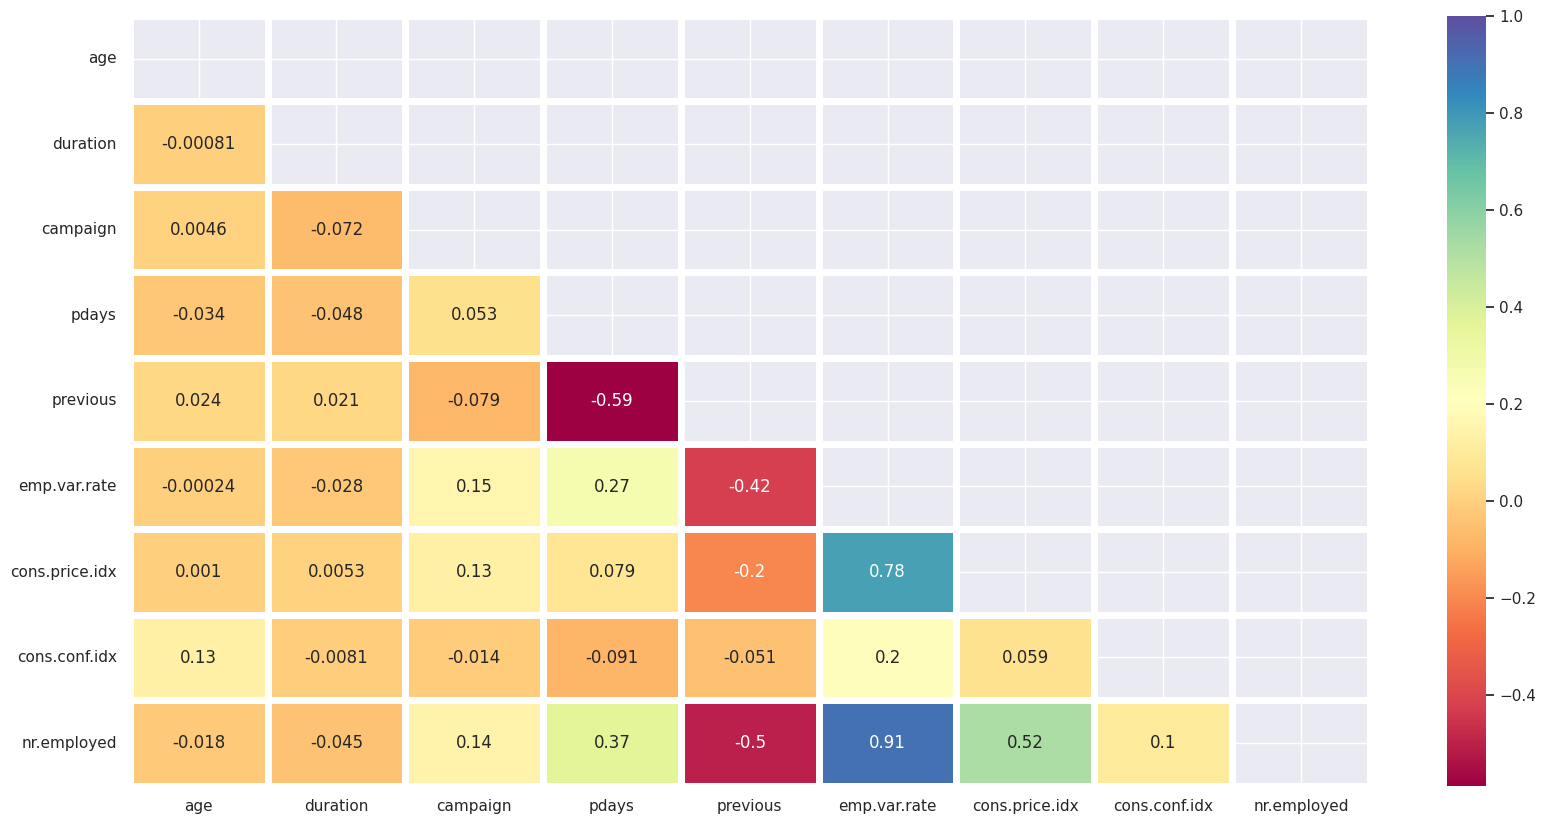

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns only
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()


sns.set(rc={'figure.figsize':(20,10)})
mask = np.triu(np.ones_like(correlation_matrix), k=0)
sns.heatmap(correlation_matrix, annot=True, cmap = 'Spectral', linewidths=5, mask=mask, vmax=1)
pass



1.  Strong Positive Correlations:    

    *   nr.employed and emp.var.rate (0.91): Employment levels and economic variation rate are closely related.
    * cons.price.idx and emp.var.rate (0.78): Consumer prices align moderately with economic variation.


2.   Strong Negative Correlations:
    *   previous and pdays (-0.59): Customers with more previous contacts are associated with lower pdays.
    *   nr.employed and pdays (-0.50): Employment levels are inversely linked to the recency of customer contact.

1.   Weak Correlations:
    *   age and most features show negligible correlations, indicating limited influence on other variables.
    *   campaign and other features have minimal correlations, suggesting independence.








### Data normalization

In [100]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

black_list = ['duration', 'y']
feats = [x for x in data if x not in black_list]

x =data[feats].to_numpy()
y = data['y'].to_numpy()
df_dummies = pd.get_dummies(data)
df_dummies

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,5191.0,False,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,5191.0,False,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,5191.0,False,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,5191.0,True,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,5191.0,False,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,4963.6,False,...,True,False,False,False,False,False,True,False,False,True
41184,46,383,1,999,0,-1.1,94.767,-50.8,4963.6,False,...,True,False,False,False,False,False,True,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,4963.6,False,...,True,False,False,False,False,False,True,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,4963.6,False,...,True,False,False,False,False,False,True,False,False,True


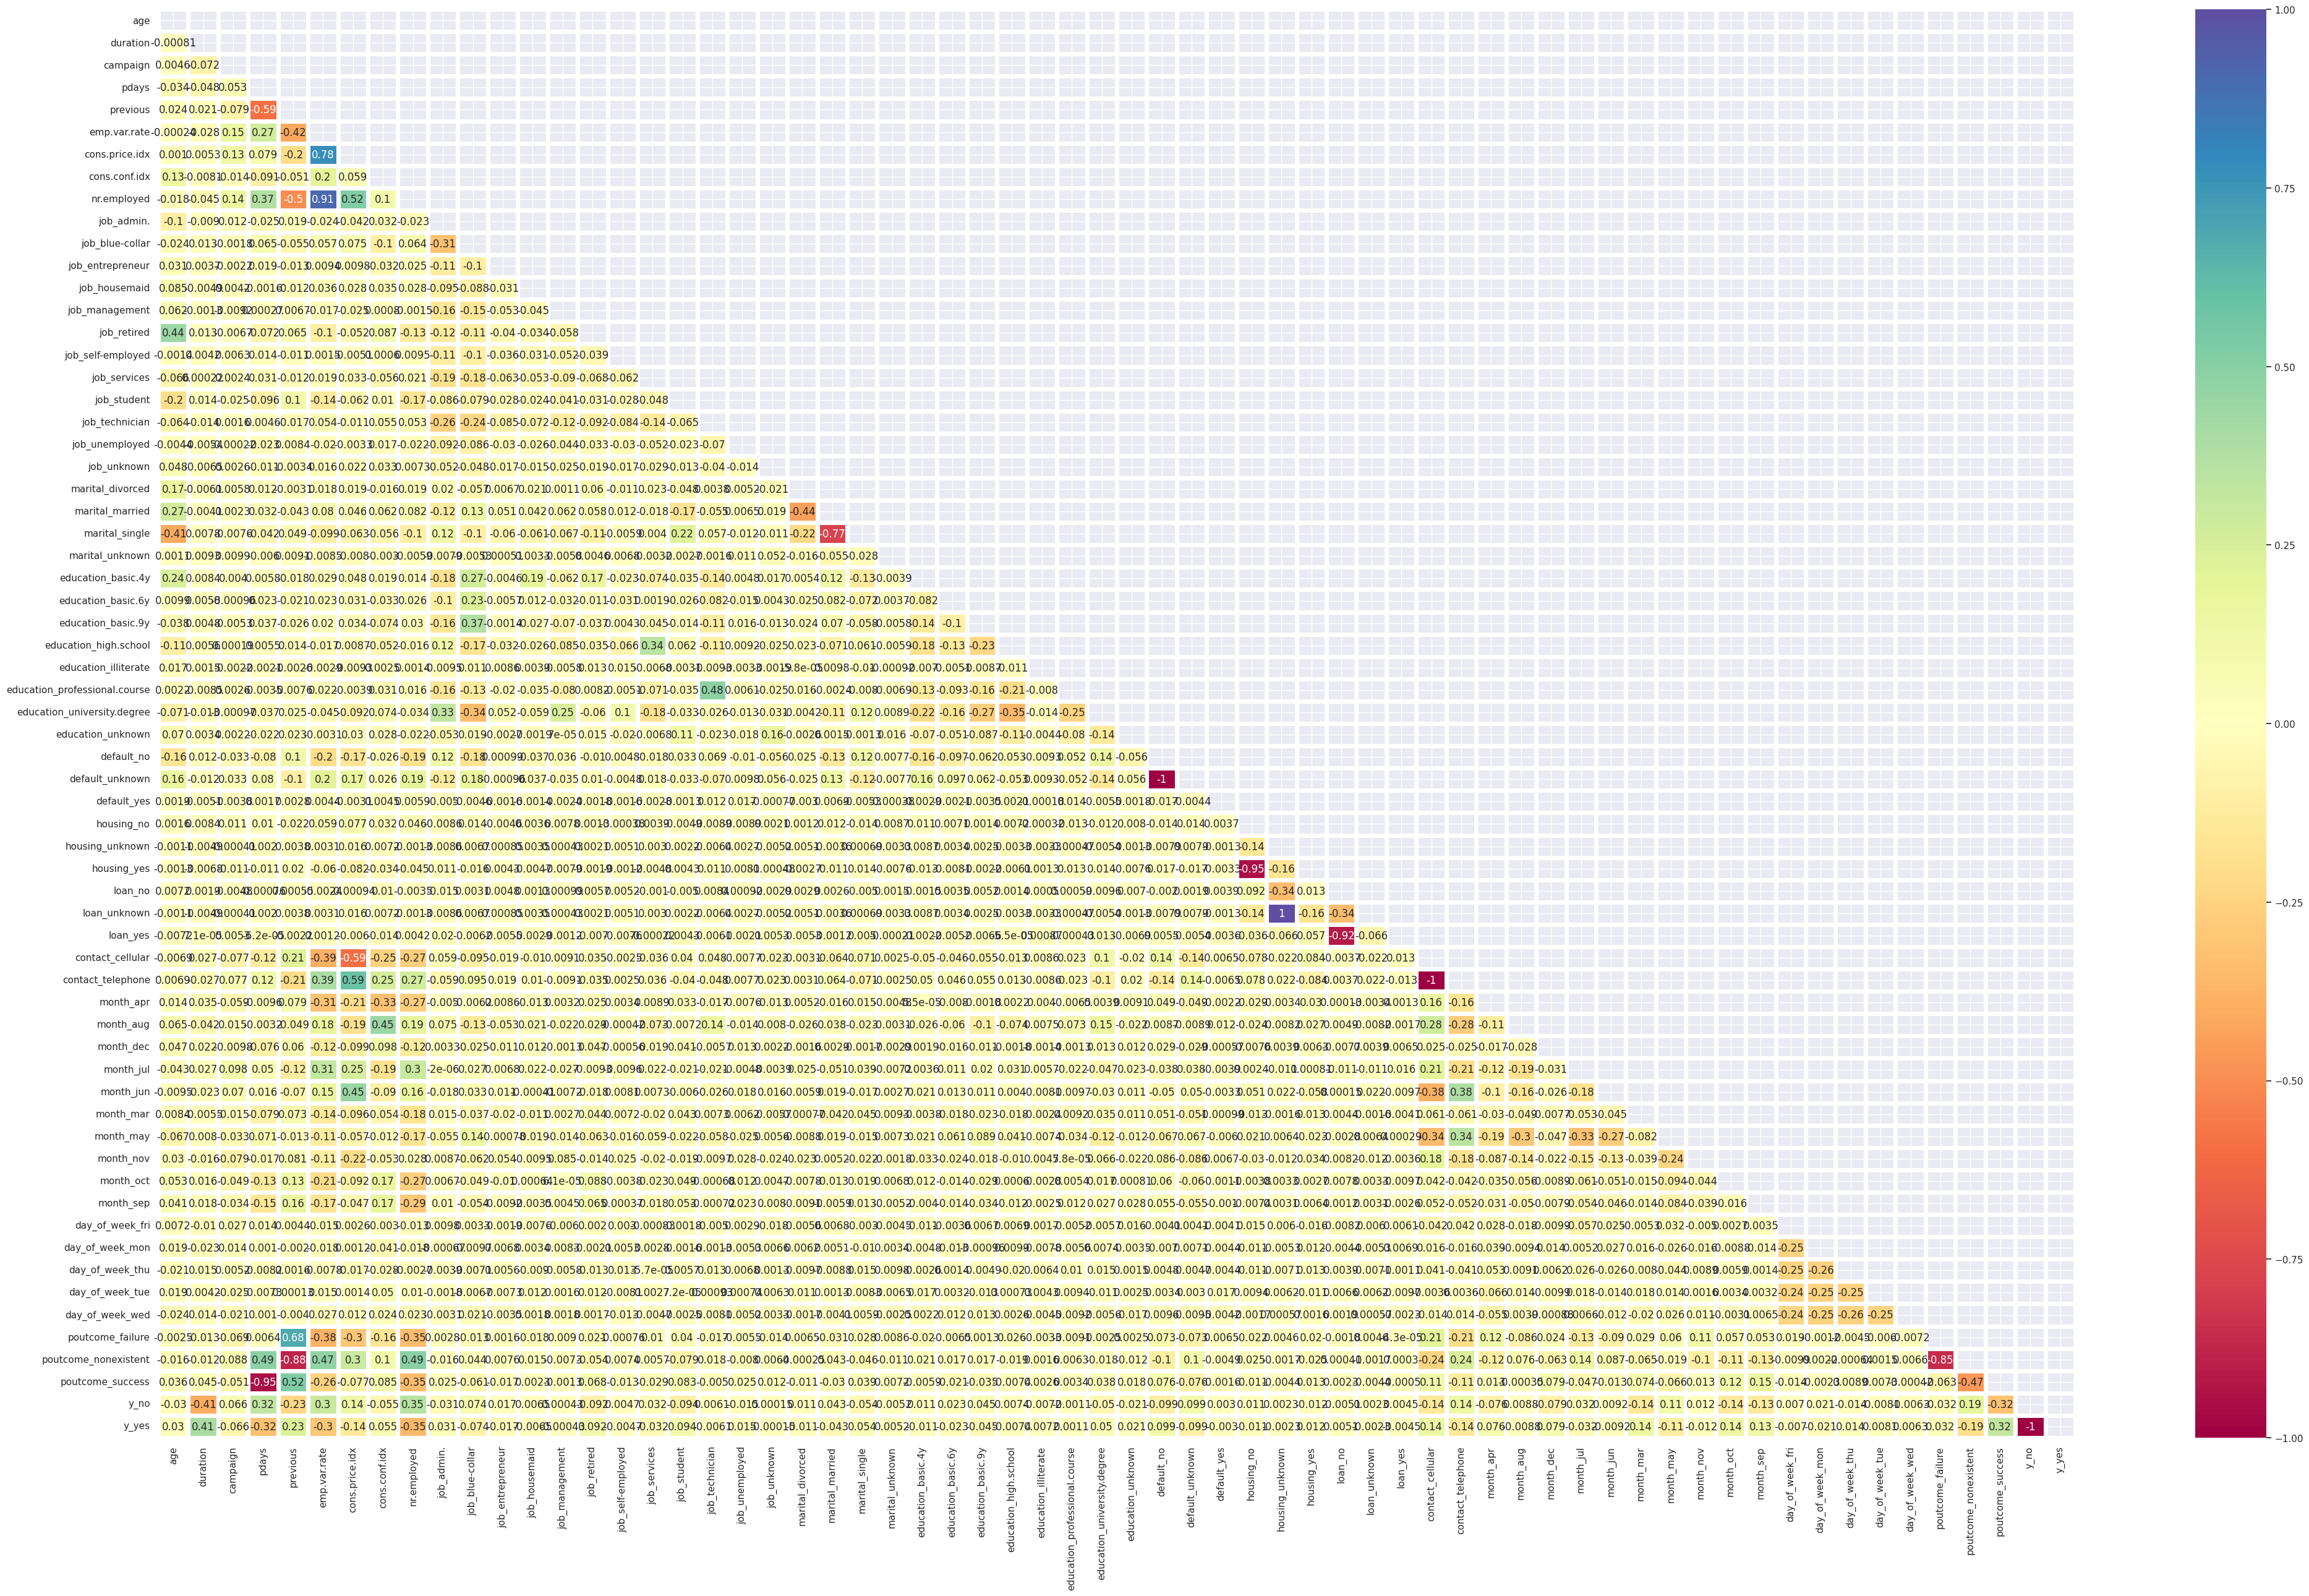

In [101]:
correlation_matrix = df_dummies.corr()
sns.set(rc={'figure.figsize':(50,30)})
mask = np.triu(np.ones_like(correlation_matrix), k=0)
sns.heatmap(correlation_matrix, annot=True, cmap = 'Spectral', linewidths=5, mask=mask, vmax=1)
pass

This is a correlation heatmap, showing the relationships between features in the dataset. Key insights:

1.   Diagonal Values (1.0): Each feature is perfectly correlated with itself.

1.   High Correlations: Highlight features with strong positive or negative relationships (e.g., near 1.0 or -1.0).
2.   Low Correlations: Most features have weak or no correlation, indicating they contribute independently.


4.   Use: Identifies redundant features for removal or transformation and helps understand feature interactions.



#Key Feature Selection

In [103]:
Matri = np.tril(correlation_matrix.to_numpy(), k=-1)
rw, col = np.where(np.abs(Matri)>=0.8)# Determine the indices of rows and columns where ∣R∣≥0.8.

col = np.unique(col)
col # Indices of variables to be removed

array([ 3,  4,  5, 33, 36, 37, 39, 42, 59, 62])

This identifies variables (columns) that have high correlations (∣R∣≥0.8) with other variables, making them candidates for removal to avoid redundancy and multicollinearity.

In [104]:
for count, feature in enumerate(df_dummies.columns):
  print(count, feature)

0 age
1 duration
2 campaign
3 pdays
4 previous
5 emp.var.rate
6 cons.price.idx
7 cons.conf.idx
8 nr.employed
9 job_admin.
10 job_blue-collar
11 job_entrepreneur
12 job_housemaid
13 job_management
14 job_retired
15 job_self-employed
16 job_services
17 job_student
18 job_technician
19 job_unemployed
20 job_unknown
21 marital_divorced
22 marital_married
23 marital_single
24 marital_unknown
25 education_basic.4y
26 education_basic.6y
27 education_basic.9y
28 education_high.school
29 education_illiterate
30 education_professional.course
31 education_university.degree
32 education_unknown
33 default_no
34 default_unknown
35 default_yes
36 housing_no
37 housing_unknown
38 housing_yes
39 loan_no
40 loan_unknown
41 loan_yes
42 contact_cellular
43 contact_telephone
44 month_apr
45 month_aug
46 month_dec
47 month_jul
48 month_jun
49 month_mar
50 month_may
51 month_nov
52 month_oct
53 month_sep
54 day_of_week_fri
55 day_of_week_mon
56 day_of_week_thu
57 day_of_week_tue
58 day_of_week_wed
59 poutco

In [105]:
# Removes the specified columns from the df_dummies DataFrame.
df_dummies= df_dummies.drop(['pdays', 'previous', 'emp.var.rate', 'default_no', 'housing_no', 'housing_unknown', 'loan_no', 'contact_cellular', 'poutcome_failure'], axis=1)

black_list = ['duration', 'y_no', 'y_yes'] # A list of columns that should not be included in the feature set for analysis
feats = [x for x in df_dummies if x not in black_list] # feats contains the names of all columns in df_dummies that are considered features (excluding duration, y_no, and y_yes)

# Evaluation of models using key variables

In [106]:
X = df_dummies[feats].to_numpy() # Converts the selected features (feats) from the df_dummies DataFrame into a NumPy array.
y = df_dummies['y_yes'].to_numpy() # Converts the target variable ('y_yes') into a NumPy array.

# Splits the data into training and testing sets to evaluate the model's generalization ability.
# Ensures reproducibility with a fixed random seed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print('Training set: %d\nTest set: %d' % (X_train.shape[0], X_test.shape[0]))

Training set: 32940
Test set: 8236


In [107]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [109]:
# over all columns in the DataFrame df_dummies and prints the index (position) and the column name for each column
for count, feature in enumerate(df_dummies.columns):
    print(count, feature)

0 age
1 duration
2 campaign
3 cons.price.idx
4 cons.conf.idx
5 nr.employed
6 job_admin.
7 job_blue-collar
8 job_entrepreneur
9 job_housemaid
10 job_management
11 job_retired
12 job_self-employed
13 job_services
14 job_student
15 job_technician
16 job_unemployed
17 job_unknown
18 marital_divorced
19 marital_married
20 marital_single
21 marital_unknown
22 education_basic.4y
23 education_basic.6y
24 education_basic.9y
25 education_high.school
26 education_illiterate
27 education_professional.course
28 education_university.degree
29 education_unknown
30 default_unknown
31 default_yes
32 housing_yes
33 loan_unknown
34 loan_yes
35 contact_telephone
36 month_apr
37 month_aug
38 month_dec
39 month_jul
40 month_jun
41 month_mar
42 month_may
43 month_nov
44 month_oct
45 month_sep
46 day_of_week_fri
47 day_of_week_mon
48 day_of_week_thu
49 day_of_week_tue
50 day_of_week_wed
51 poutcome_nonexistent
52 poutcome_success
53 y_no
54 y_yes


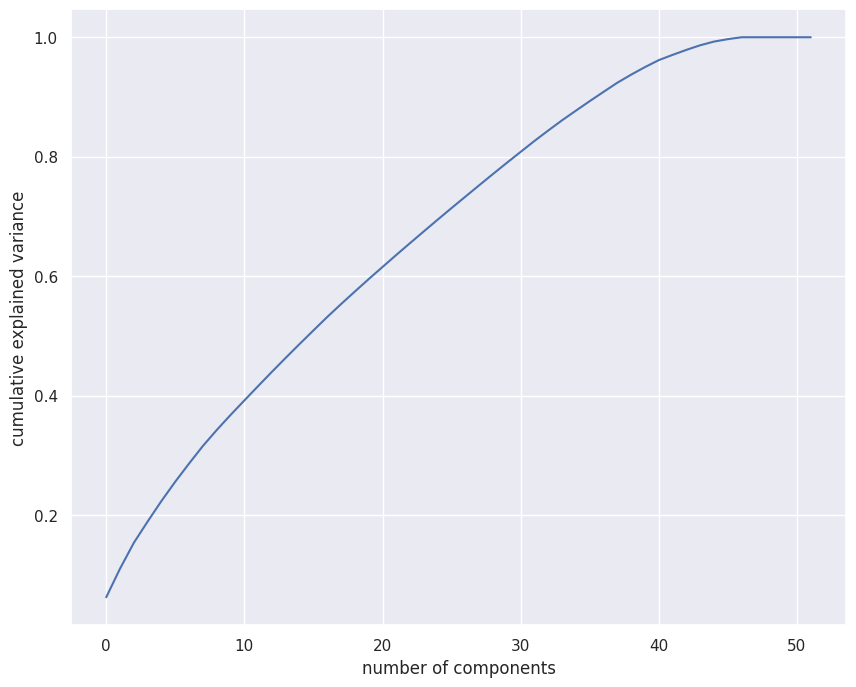

In [110]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA()
pca.fit(X_train)
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.gcf().set_size_inches(10, 8)



*   Purpose: Identifies the optimal number of components for dimensionality reduction.
*   Interpretation: Around 30 components capture most of the variance (~95%), balancing reduced dimensionality with preserved information.



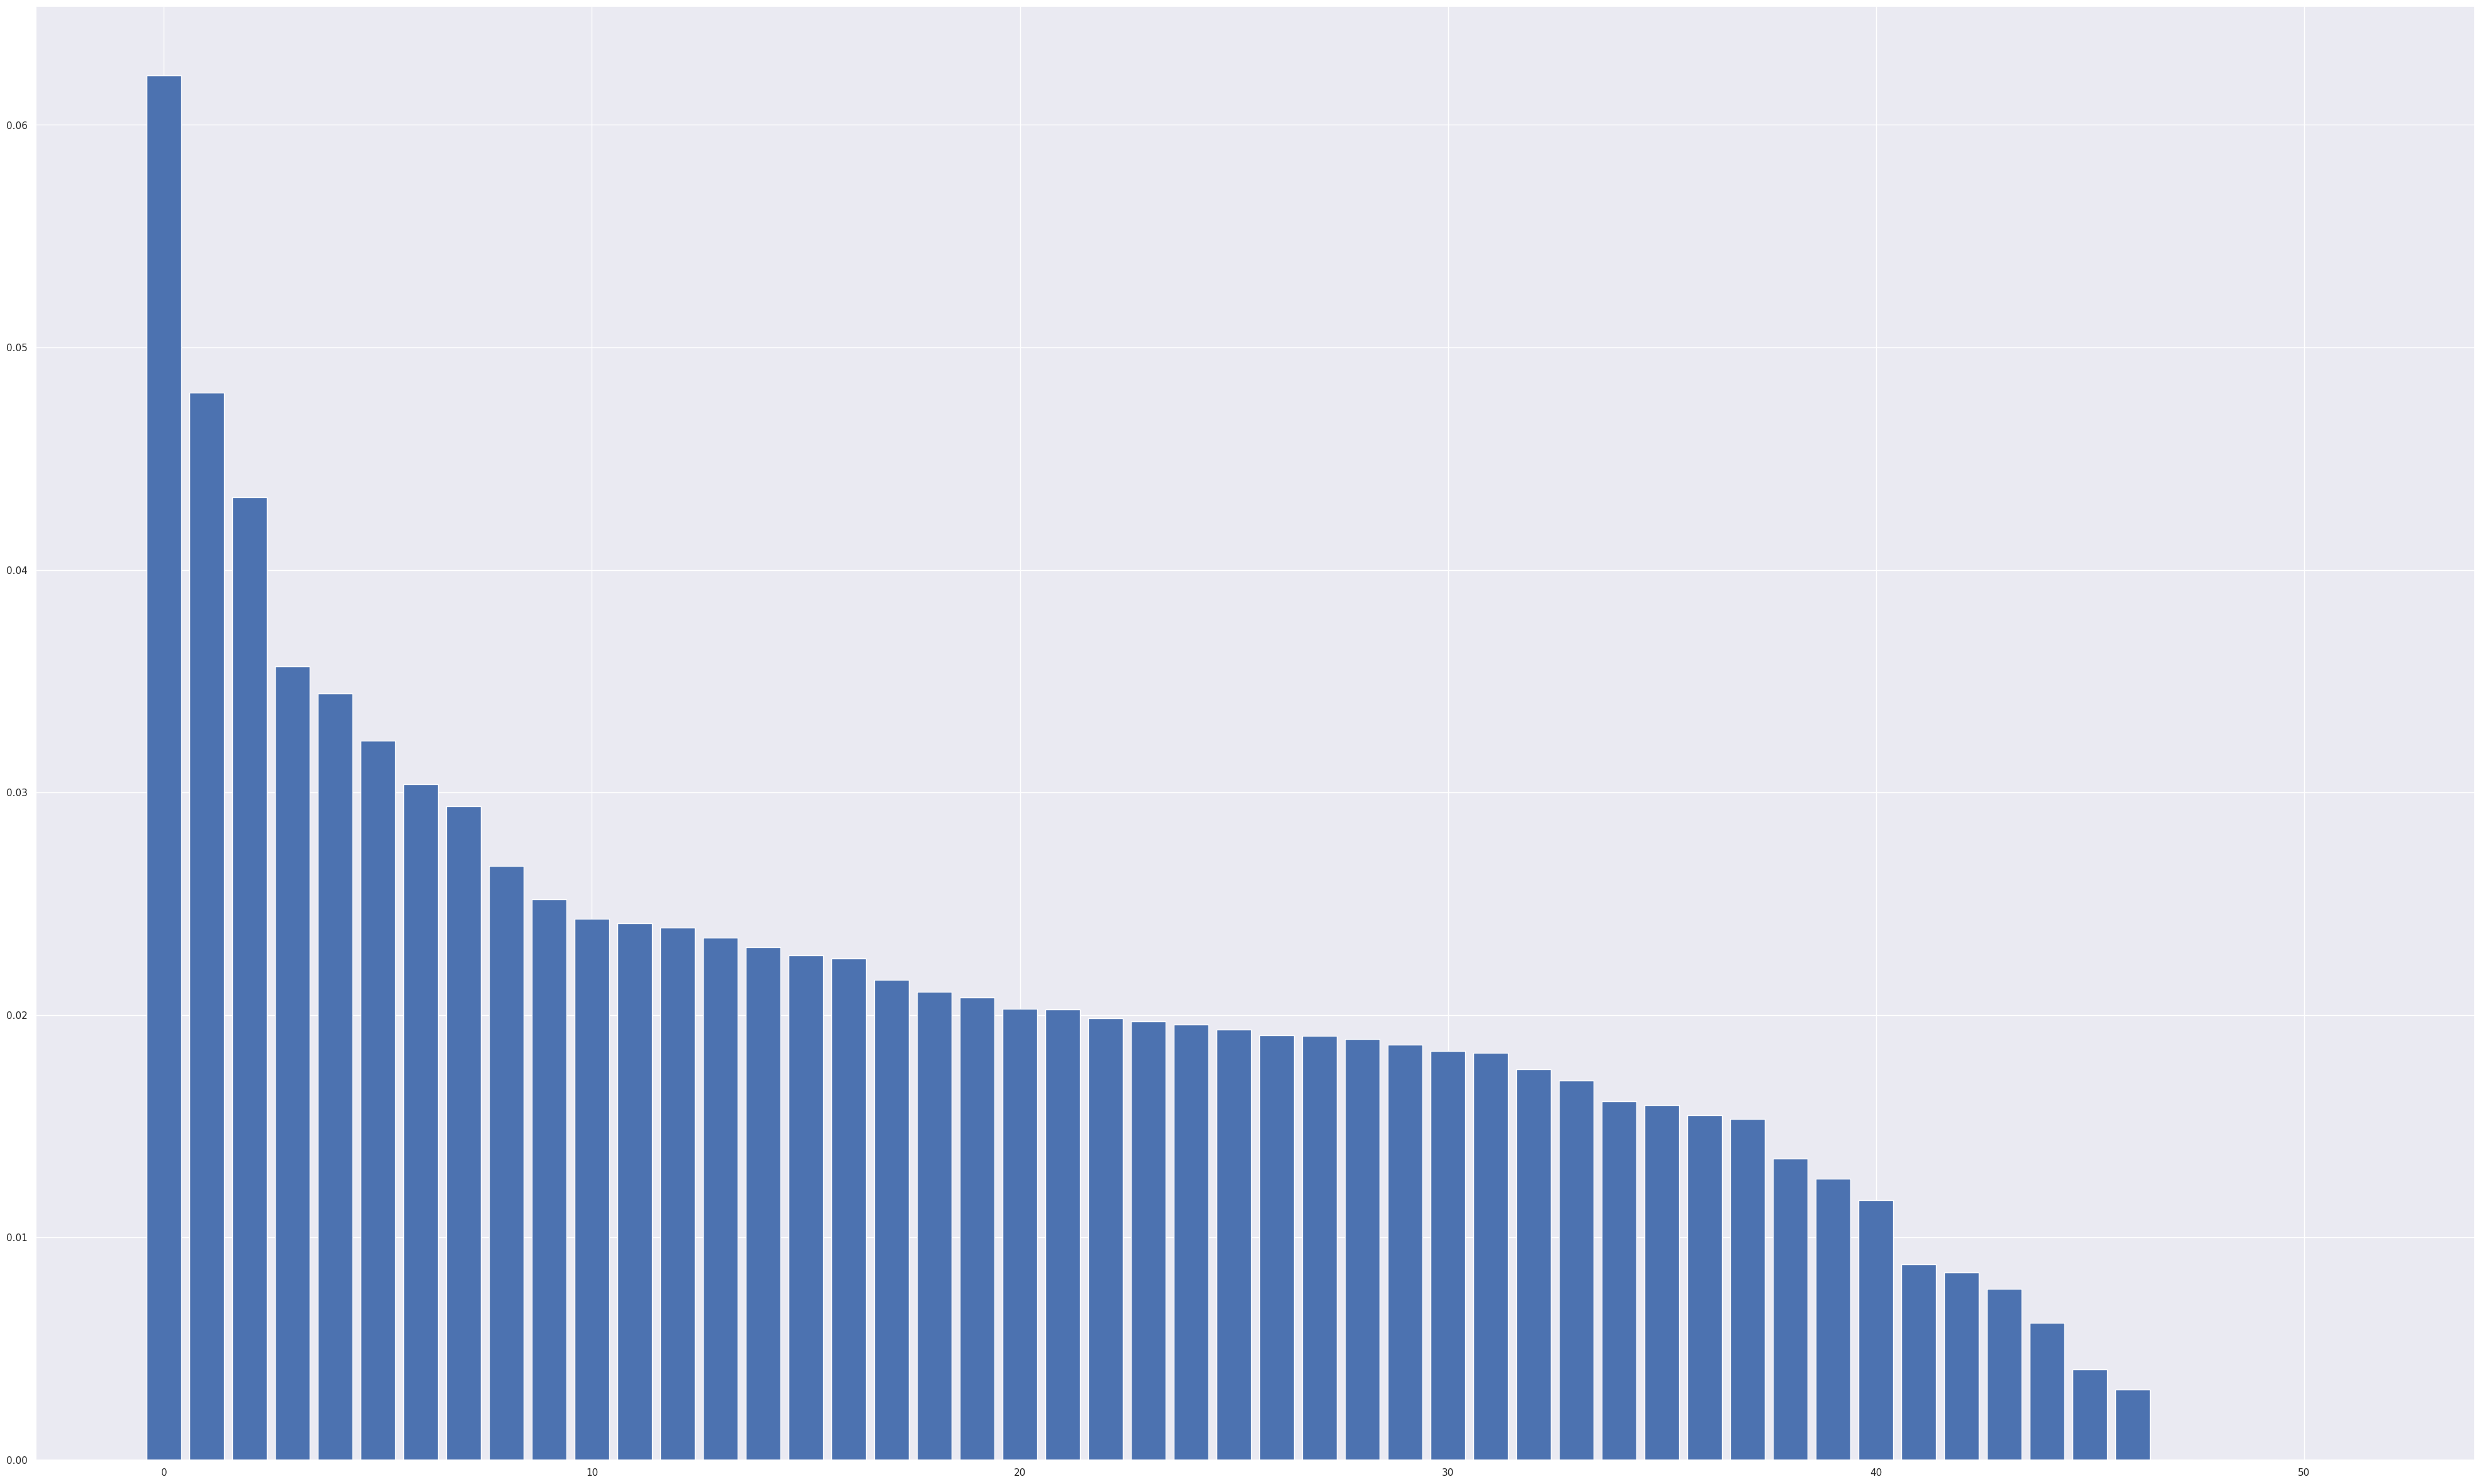

In [111]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
pass

The plot shows the variance explained by each PCA component. The first few components capture most of the variance, with diminishing contributions from later components. This helps decide how many components to retain for effective dimensionality reduction.

In [112]:
# detailed view of the variance explained by each component
print(pca.explained_variance_ratio_)
print("----------------")
print(np.round(pca.explained_variance_ratio_,3))

[0.06222222 0.04797487 0.04325953 0.03564669 0.03443256 0.03231679
 0.03037985 0.02938387 0.02667976 0.02519275 0.02432367 0.02412965
 0.02393556 0.02346281 0.02305727 0.02268222 0.02254058 0.02157585
 0.02103025 0.02078187 0.02028449 0.02025567 0.01985176 0.01971944
 0.01956537 0.01933864 0.01909048 0.01905098 0.0189116  0.018649
 0.01836597 0.01827955 0.01754899 0.01705147 0.01612872 0.01594353
 0.01550407 0.01533419 0.01352816 0.01263903 0.01166617 0.00878484
 0.00840899 0.00770016 0.00615253 0.0040683  0.00316926 0.
 0.         0.         0.         0.        ]
----------------
[0.062 0.048 0.043 0.036 0.034 0.032 0.03  0.029 0.027 0.025 0.024 0.024
 0.024 0.023 0.023 0.023 0.023 0.022 0.021 0.021 0.02  0.02  0.02  0.02
 0.02  0.019 0.019 0.019 0.019 0.019 0.018 0.018 0.018 0.017 0.016 0.016
 0.016 0.015 0.014 0.013 0.012 0.009 0.008 0.008 0.006 0.004 0.003 0.
 0.    0.    0.    0.   ]


This helps to decide how many components to retain based on their contribution to the total variance.

In [113]:
n_pca_comp = 28 # first 28 components will be used, which capture the majority of the variance in the data.
X_pca_train = pca.transform(X_train)[:, :n_pca_comp] # Reduces the dimensionality of the training data to 28 features while preserving most of its variance
X_pca_test = pca.transform(X_test)[:,:n_pca_comp] # Ensures the test data is reduced to the same number of dimensions as the training data

In [114]:
# four different machine learning models from the sklearn library
model_lr = LogisticRegression()
model_kn = KNeighborsClassifier()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

In [115]:
#  Training four different machine learning models using a dataset (X_pca_train and y_train).
model_lr.fit(X_pca_train,y_train)
model_kn.fit(X_pca_train,y_train)
model_dt.fit(X_pca_train,y_train)
model_rf.fit(X_pca_train,y_train)

RandomForestClassifier()

# Model

In [116]:
# RandomForestClassifier

model_rf.fit(X_pca_train,y_train)
print(confusion_matrix(y_train,model_rf.predict(X_pca_train)))

[[29182    37]
 [  170  3551]]


In [117]:
y_pred = model_rf.predict(X_pca_test)
print(confusion_matrix(y_test,y_pred))

[[7109  209]
 [ 715  203]]


In [118]:
y_pred = model_rf.predict(X_pca_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      7318
        True       0.49      0.22      0.31       918

    accuracy                           0.89      8236
   macro avg       0.70      0.60      0.62      8236
weighted avg       0.86      0.89      0.87      8236





*   The model performs significantly better for the False (Class 0) than for the True (Class 1), likely due to class imbalance (7318 vs. 918).
*   The model has high overall accuracy and performs well for the majority class (Class 0).



In [119]:
import shap

# Initialize shap explainer
explainer = shap.Explainer(model, X_train)

# Get SHAP values for all observations in the test set
shap_values = explainer.shap_values(X_test)

# Get SHAP values for observation #4
shap_values_4 = shap_values[4]

# Plot SHAP values for observation #4
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_4, X_test[4], feature_names=X.columns)

# Get SHAP values for observation #20
shap_values_20 = shap_values[20]

# Plot SHAP values for observation #20
shap.force_plot(explainer.expected_value, shap_values_20, X_test[20], feature_names=X.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

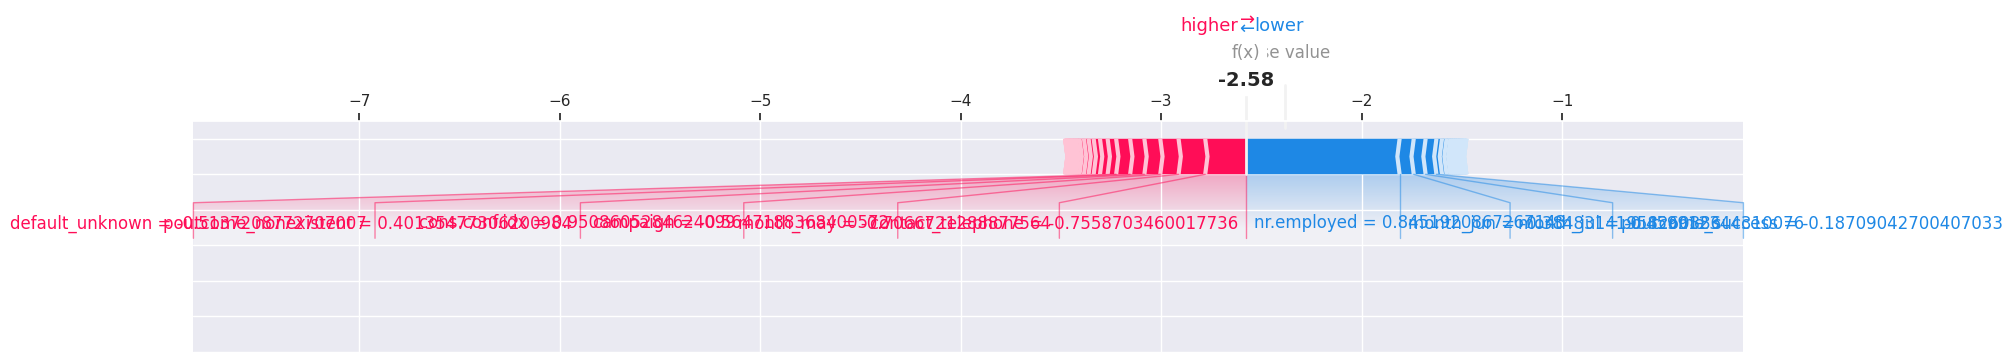

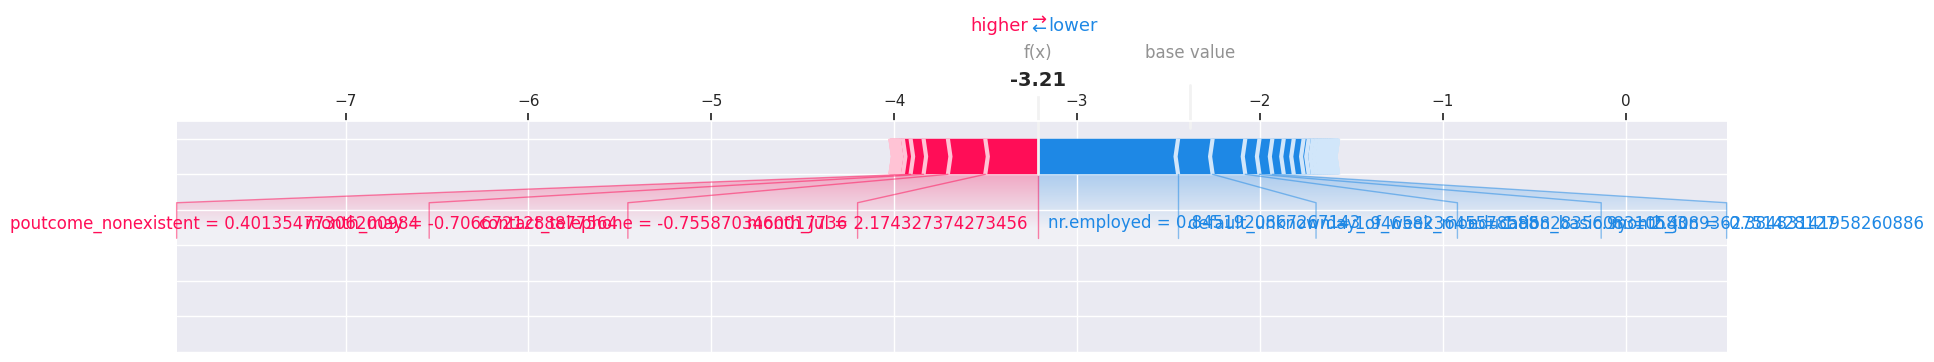

In [123]:


# Convert X_test back to a DataFrame with column names
X_test_df = pd.DataFrame(X_test, columns=feats)

# Get SHAP values for observation #4
shap_values_4 = shap_values[4]
# Plot SHAP values for observation #4
shap.force_plot(explainer.expected_value, shap_values_4, X_test_df.iloc[4], feature_names=feats, matplotlib=True)


# Get SHAP values for observation #20
shap_values_20 = shap_values[20]
# Plot SHAP values for observation #20
shap.force_plot(explainer.expected_value, shap_values_20, X_test_df.iloc[20], feature_names=feats, matplotlib=True)





1.  Observation #4:
The negative prediction value (-2.58) is influenced by:
   *   Red Features (Positive Contribution): default_unknown contributes positively but does not dominate.
   *   Blue Features (Negative Contribution): nr.employed has a strong negative impact, pulling the prediction lower.


2.   Observation #20:
The negative prediction value (-3.21) is influenced by:
   *   Red Features: poutcome_nonexistent contributes positively but is relatively small.
   *   Blue Features: nr.employed again strongly pulls the prediction downward.



